In [1]:
import ROOT as rt

Welcome to JupyROOT 6.18/04


In [2]:
canvas = rt.TCanvas("canvas")

In [3]:
# Getting the inputs
before_correction_input = rt.TFile("../online/output/lambda_0_20.root")
after_correction_input = rt.TFile("trig_4_8_assoc_2_4_cent_0_20_mixcorr_hLambda.root")

before_list = before_correction_input.Get("h-lambda")

Error in <TFile::TFile>: file ../online/output/lambda_0_20.root does not exist


In [21]:
# Getting the 2d dists for before and after (setting correct pt ranges for before)
before_list.FindObject("fDphiHStrangePart").GetAxis(0).SetRangeUser(4, 8)
before_list.FindObject("fDphiHStrangePart").GetAxis(1).SetRangeUser(2, 4)

before_dist = before_list.FindObject("fDphiHStrangePart").Projection(2, 3)
after_dist = after_correction_input.Get("hStrangePart2Dpeak")
mixed = after_correction_input.Get("uncorrhLambdaMixed2Dpeak")

deta_max = 1.2

before_dist.GetXaxis().SetRangeUser(-deta_max, deta_max)
after_dist.GetXaxis().SetRangeUser(-deta_max, deta_max)

Warning in <TFile::Append>: Replacing existing TH1: fDphiHStrangePart_proj_3_2 (Potential memory leak).


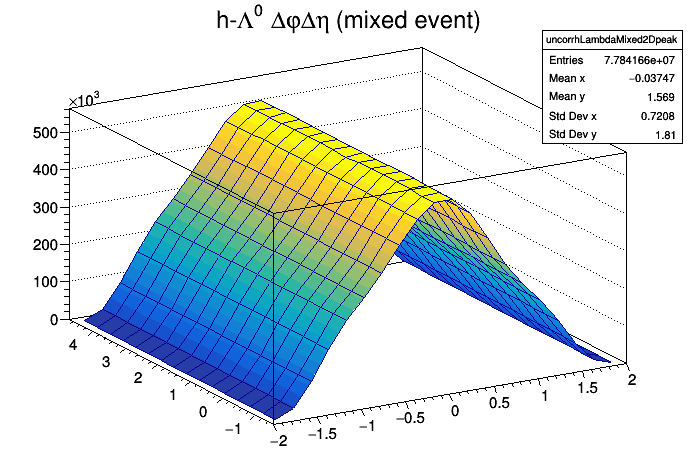

In [5]:
mixed = after_correction_input.Get("uncorrhLambdaMixed2Dpeak")
mixed.SetTitle("h-#Lambda^{0} #Delta#varphi#Delta#eta (mixed event)")
mixed.Draw("SURF1")
canvas.Draw()

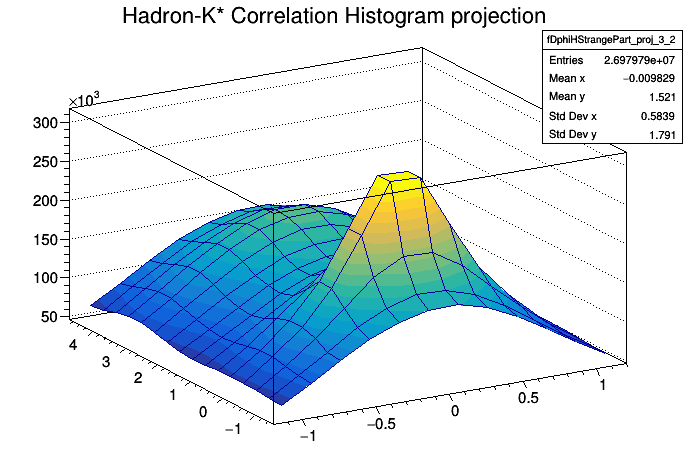

In [22]:
before_dist.Draw("SURF1")
canvas.Draw()

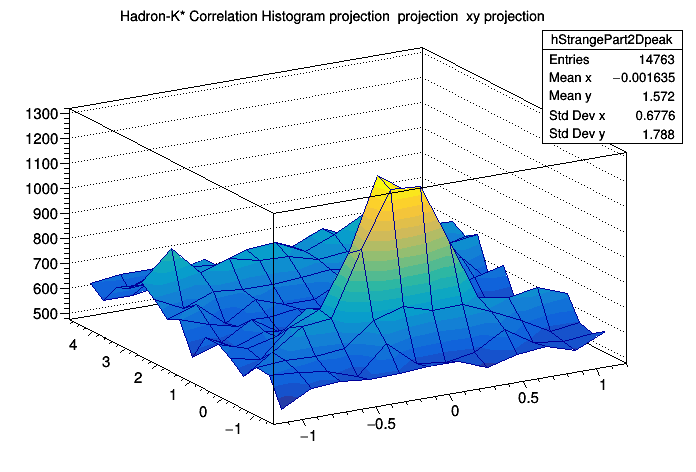

In [23]:
after_dist.Draw("SURF1")
canvas.Draw()
